In [1]:
# from bao import *
from static import *
from stock_data import *
from efficient_frontier import *
from icecream import ic

with open(PATH_DICTIONARY, "r") as a:
    name_dict = json.load(a)

In [2]:
stock = StockData("./data/stock/", "./stock_dictionary.json")
stock_data = stock.get_data()

In [3]:
with open(PATH_INDEX, "r") as a:
    index_l = json.load(a)

In [4]:
stock_data.drop(columns=["symbol"], inplace=True)

In [5]:
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN30"]))
]
weight = df.pivot_table(index="time", values="market_value", columns="ticker")
# weight = weight.fillna(method="bfill")
# weight = weight.fillna(method="ffill")
weight.dropna(axis=1, inplace=True)

returns_df = df[df["ticker"].isin(weight.columns)].pivot_table(
    index="time", values="log_return", columns="ticker"
)
from scipy.optimize import minimize

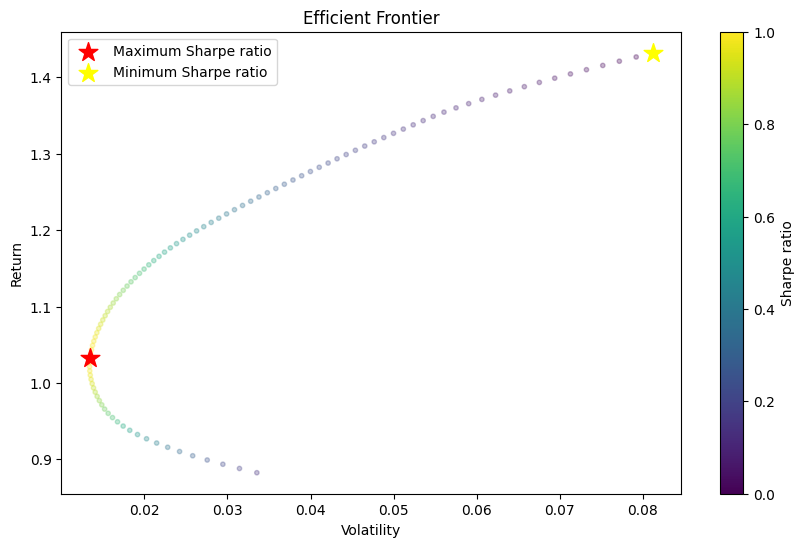

In [14]:
result = efficient_frontier(returns_df, num_portfolios=100, risk_free_rate=0.01, range0=(0, 1))
# ic(result)

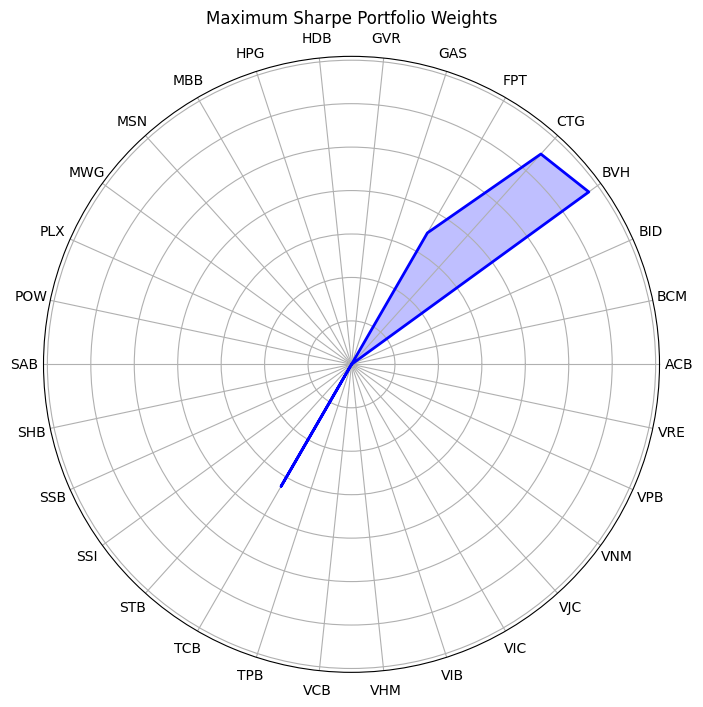

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights from the Maximum Sharpe portfolio
weights = result["Minimum Sharpe"]["Weights"]

# Define the labels and number of variables
labels = list(weights.keys())
num_vars = len(labels)

# Compute the angle for each label
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart needs to be a closed loop
values = list(weights.values())
values += values[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="blue", alpha=0.25)
ax.plot(angles, values, color="blue", linewidth=2)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Maximum Sharpe Portfolio Weights")
plt.show()

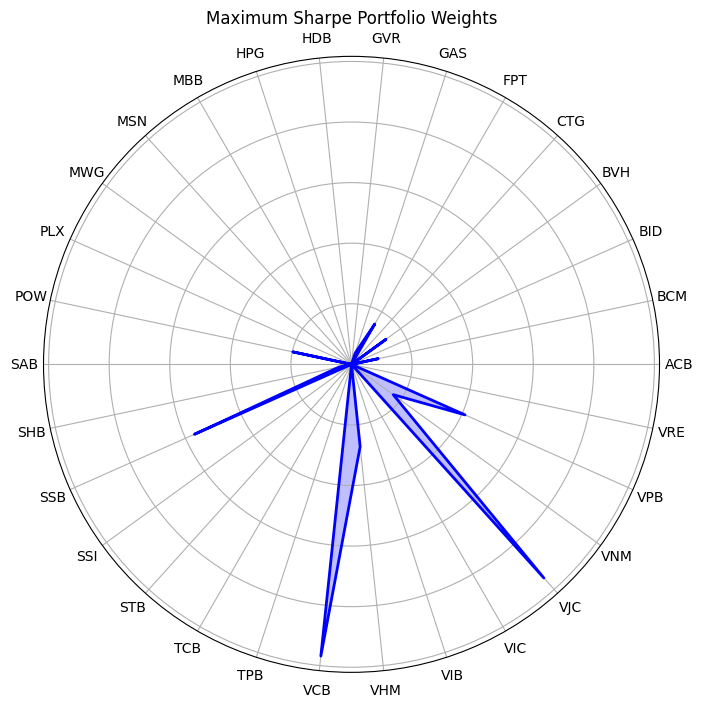

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights from the Maximum Sharpe portfolio
weights = result["Maximum Sharpe"]["Weights"]

# Define the labels and number of variables
labels = list(weights.keys())
num_vars = len(labels)

# Compute the angle for each label
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart needs to be a closed loop
values = list(weights.values())
values += values[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="blue", alpha=0.25)
ax.plot(angles, values, color="blue", linewidth=2)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Maximum Sharpe Portfolio Weights")
plt.show()

Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside bounds during a minimize step, clipping to bounds
Values in x were outside 

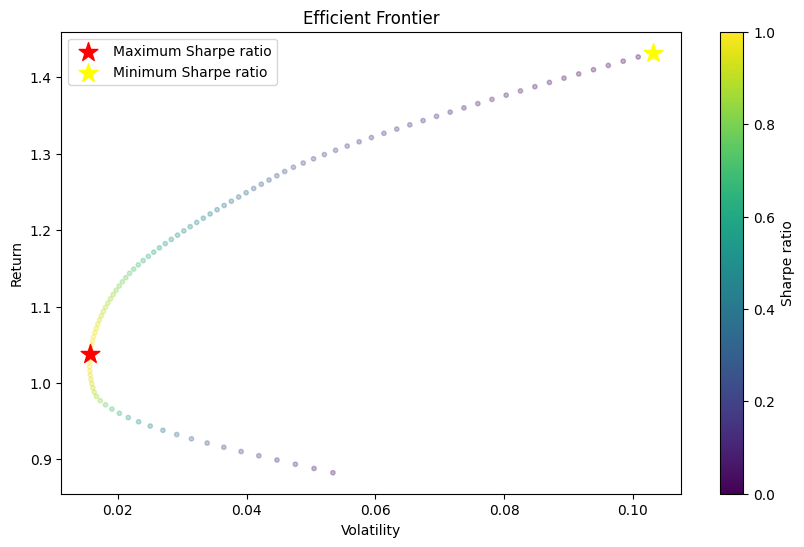

In [20]:
# with minimum weight of stock is 1%
result = efficient_frontier(returns_df, num_portfolios=100, risk_free_rate=0.01)
# ic(result)

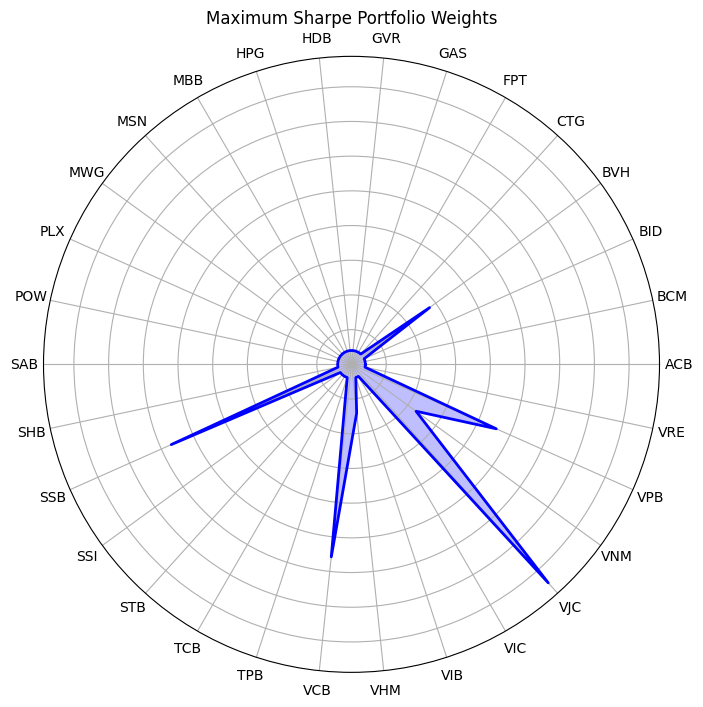

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights from the Maximum Sharpe portfolio
weights = result["Maximum Sharpe"]["Weights"]

# Define the labels and number of variables
labels = list(weights.keys())
num_vars = len(labels)

# Compute the angle for each label
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart needs to be a closed loop
values = list(weights.values())
values += values[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="blue", alpha=0.25)
ax.plot(angles, values, color="blue", linewidth=2)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Maximum Sharpe Portfolio Weights")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights from the Maximum Sharpe portfolio
weights = result["Minimum Sharpe"]["Weights"]

# Define the labels and number of variables
labels = list(weights.keys())
num_vars = len(labels)

# Compute the angle for each label
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart needs to be a closed loop
values = list(weights.values())
values += values[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="blue", alpha=0.25)
ax.plot(angles, values, color="blue", linewidth=2)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Maximum Sharpe Portfolio Weights")
plt.show()